In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('csv/RazoMejia2018_data.csv')
data = data[(data['operator']=='O2') & (data['rbs']=='RBS1027')]

In [5]:
agged = data.groupby(['IPTG_uM']).agg(('mean', 'sem')).reset_index()

In [6]:
agged

IPTG_uM          date           binding_energy      repressors       \
                    mean       sem           mean  sem       mean  sem   
0      0.0  2.016081e+07  1.018019          -13.9  0.0        130  0.0   
1      0.1  2.016081e+07  1.018019          -13.9  0.0        130  0.0   
2      5.0  2.016081e+07  1.018019          -13.9  0.0        130  0.0   
3     10.0  2.016081e+07  1.018019          -13.9  0.0        130  0.0   
4     25.0  2.016081e+07  1.018019          -13.9  0.0        130  0.0   
5     50.0  2.016081e+07  1.018019          -13.9  0.0        130  0.0   
6     75.0  2.016081e+07  1.018019          -13.9  0.0        130  0.0   
7    100.0  2.016081e+07  1.018019          -13.9  0.0        130  0.0   
8    250.0  2.016081e+07  0.971825          -13.9  0.0        130  0.0   
9    500.0  2.016081e+07  1.018019          -13.9  0.0        130  0.0   
10  1000.0  2.016081e+07  1.018019          -13.9  0.0        130  0.0   
11  5000.0  2.016081e+07  1.120020          -13.9  0.0        130  0.0   

      mean_YFP_A             mean_YFP_bgcorr_A             fold_change_A  \
            mean         sem              mean         sem          mean   
0    3598.864173   43.327276        256.154142   19.465176      0.014972   
1    3601.097161   44.639769        258.877270   33.194991      0.014205   
2    4075.559245   82.698340        764.782878   80.032710      0.042518   
3    4723.471295  123.154089       1409.054940  111.222580      0.077225   
4    7674.788693  394.614050       4367.908396  388.316120      0.238456   
5   11783.885535  317.459089       8474.920431  303.109218      0.464435   
6   13827.510058  646.978063      10531.115326  651.778238      0.579559   
7   16124.234753  598.442916      12816.655160  591.461009      0.699709   
8   18770.305439  794.209143      15467.096281  776.481007      0.866134   
9   19310.100610  684.601043      15975.356777  663.049593      0.897216   
10  18928.118486  702.406181      15615.785456  681.028399      0.901139   
11  17497.130003  390.922405      14236.432811  388.391056      0.879471   

              
         sem  
0   0.000810  
1   0.001298  
2   0.003828  
3   0.005563  
4   0.018420  
5   0.014294  
6   0.026418  
7   0.019521  
8   0.016222  
9   0.015962  
10  0.014690  
11  0.032251

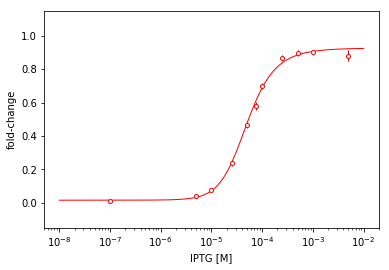

In [22]:
# Compute the fit
c_range = np.logspace(-2, 4, 500)
pact = (1 + np.exp(-4.5) * ((1 + c_range / 0.53) / (1 + c_range / 139))**2)**-1
fc = (1 + pact * (260 / 4.6E6) * np.exp(13.9))**-1


fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.errorbar(agged['IPTG_uM'] / 1E6, agged['fold_change_A']['mean'], agged['fold_change_A']['sem'],
           markerfacecolor='w', markeredgecolor='r', markeredgewidth=1, fmt='o', linestyle='none',
           ms=4, color='red', lw=1)
ax.plot(c_range / 1E6, fc, color='red', lw=1)
ax.set_xscale('log')
ax.set_ylim([-0.15, 1.15])
ax.set_xlabel('IPTG [M]')
ax.set_ylabel('fold-change')
plt.savefig('/Users/gchure/Desktop/O2_R260_fit.svg')

In [20]:
pact

array([0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901306,
       0.98901306, 0.98901306, 0.98901306, 0.98901306, 0.98901305,
       0.98901305, 0.98901305, 0.98901305, 0.98901305, 0.98901305,
       0.98901305, 0.98901305, 0.98901305, 0.98901305, 0.98901